# SMS SPAM CLASSIFIER MODEL




# Author :- @dineshsingh099  https://github.com/dineshsingh099

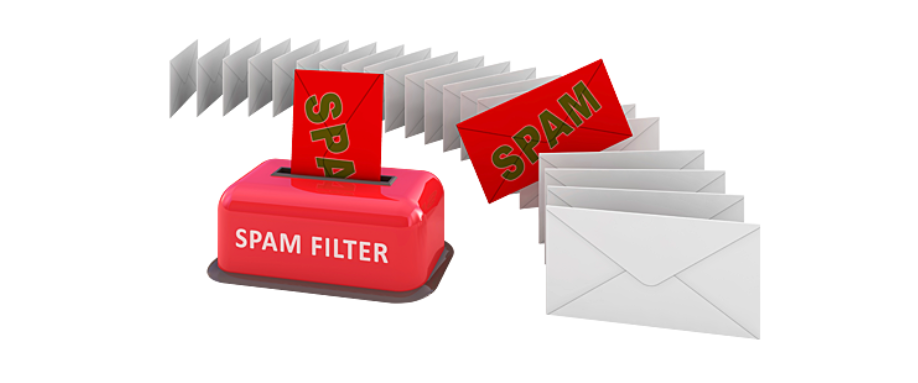

# Import Required Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy


In [5]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Let's read the dataset

In [6]:
data = pd.read_csv("spam.csv",encoding=' latin1')

# Let's have a look on our dataset

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Let's see how many rows and columns in our dataset

In [8]:
data.shape

(5572, 5)

# Let's see what are the different columns in our dataset

In [9]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# **1. Data Cleaning**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# I drop the last 3 feature because they has nan values so it's note good for my model

In [11]:
data.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

# after droping feature my data looks like something that!

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# rename the columns so that i can easily understand

In [13]:
data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [14]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Check Missing Value in dataset

In [15]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

# Check for duplicate values in dataset

In [16]:
data.duplicated().sum()

403

# Remove duplicate values in dataset

In [17]:
data = data.drop_duplicates(keep='first')

In [18]:
data.duplicated().sum()

0

# resets the index of the DataFrame while dropping the previous index.

In [19]:
data = data.reset_index(drop =True)

In [20]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [21]:
data.shape

(5169, 2)

# 2. EDA(Exploratory Data Analysis)

In [22]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# checking the imbalanced Category feature

In [23]:
data['Category'].value_counts()

Category
ham     4516
spam     653
Name: count, dtype: int64

# creates a pie chart based on the counts of unique values in 'Category' column, with labels 'ham' and 'spam', displaying percentages with two decimal points, and adding a legend.







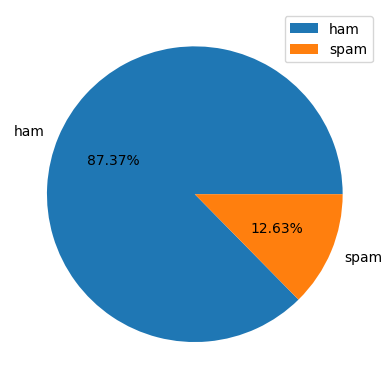

In [24]:
plt.pie(data['Category'].value_counts(),labels = ['ham', 'spam'], autopct = '%.2f%%');
plt.legend();

# count number of character in text

In [25]:
data['num_characters'] = data['Message'].apply(len)

In [26]:
data.head()

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# count number of words in text

In [27]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
data.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


# count number of sentence in text

In [29]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# getting more information of features

In [31]:
data.describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


# information for (ham) type

In [32]:
data[data['Category'] == 'ham'].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


# information for (spam) type

In [33]:
data[data['Category'] == 'spam'].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# draw the pair plot to see the collinearity

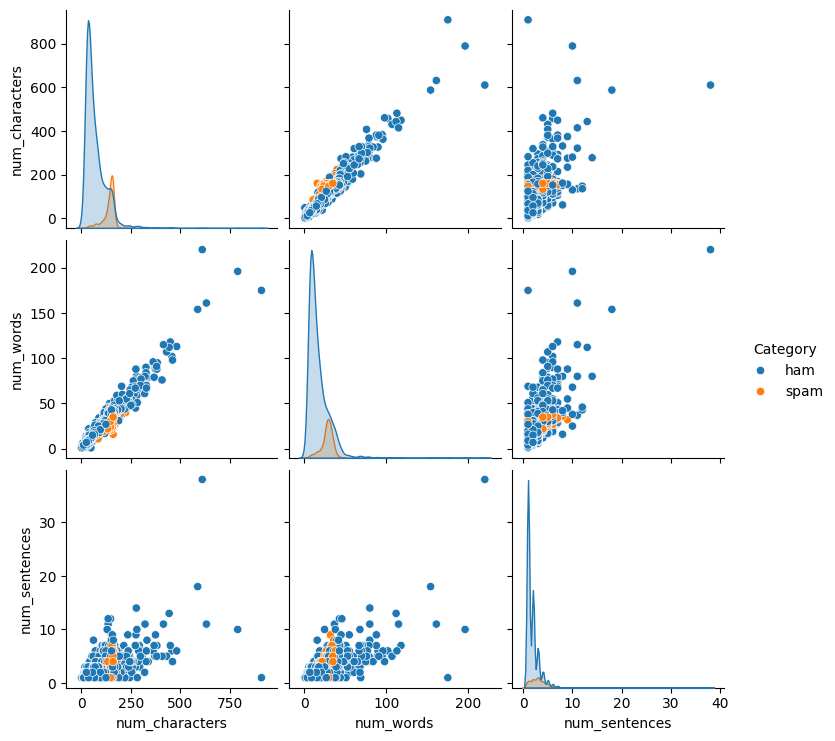

In [34]:
sns.pairplot(data,hue="Category")
plt.show()

In [35]:
data.corr(numeric_only=True)

,num_characters,num_words,num_sentences
num_characters,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


# # as we can see there is slightly collinearity in data

<Axes: >

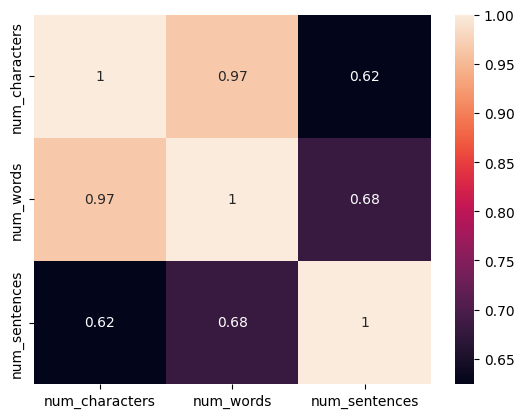

In [36]:
sns.heatmap(data.corr(numeric_only=True), annot=True)


# 3. Data Preprocessing


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming







In [37]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [38]:
def clean_message(Message):
    Message = Message.lower() # lower casing
    Message = nltk.word_tokenize(Message) # tokenization

    y =[]
    for i in Message:
      if i.isalnum():
        y.append(i)

    Message = y[:]
    y.clear() # remove special characters

    for i in Message:
      if i not in stopwords.words('english') and i not in string.punctuation: # stopword & punctuation remove
        y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
      y.append(port_stemmer.stem(i))  # stemming

    return " ".join(y)

In [39]:
clean_message("I love to see the Artificial Intelligence Models. How about yOu?")

'love see artifici intellig model'

In [40]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
data['Clean Message'] = data ['Message'].apply(clean_message)

In [42]:
data.columns

Index(['Category', 'Message', 'num_characters', 'num_words', 'num_sentences',
       'Clean Message'],
      dtype='object')

In [43]:
data.head(10)

,Category,Message,num_characters,num_words,num_sentences,Clean Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,ham,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,spam,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


# World cloud : A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it's important.

# Let's see the wich words are use to make a message spam or ham by bolding those words

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='Black')

# for spam

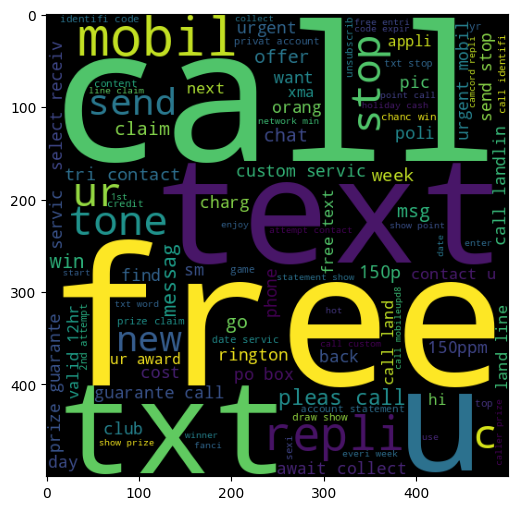

In [45]:
spam_ = wc.generate(data[data['Category']=='spam']['Clean Message'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_)

# for ham

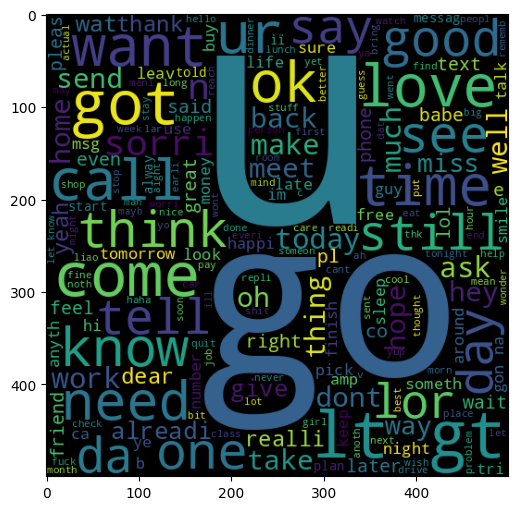

In [46]:
ham_ = wc.generate(data[data['Category']=='ham']['Clean Message'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_)

# now i see the top 30 words which make a message spam

In [47]:
spam_word = []
for msg in data[data['Category']== 'spam']['Clean Message'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [48]:
len(spam_word)

9939

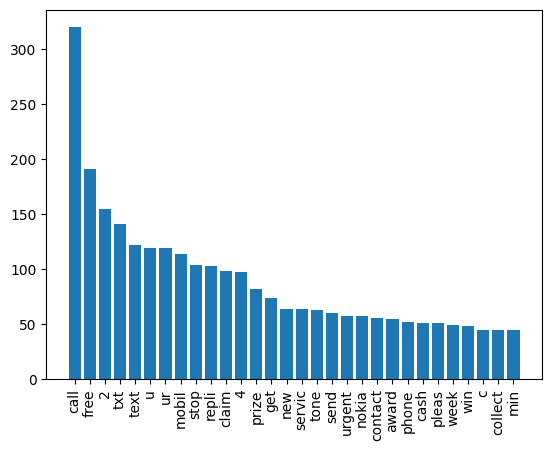

In [49]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

# now i see the top 30 words which make a message Ham

In [50]:
ham_word = []
for msg in data[data['Category'] == 'ham']['Clean Message'].tolist():
  for word in msg.split():
    ham_word.append(word)


In [51]:
len(ham_word)

35404

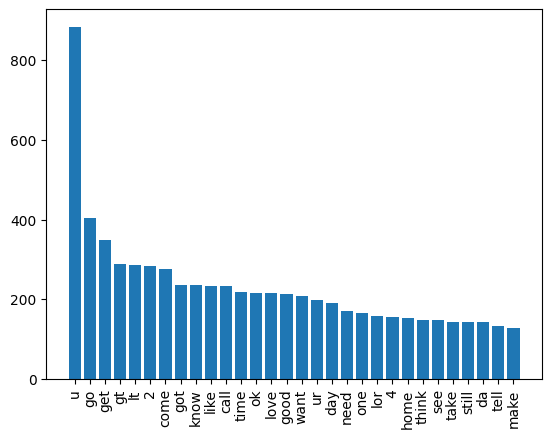

In [52]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

# encode the target feature into numbers

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['Category'])

In [54]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,Clean Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,0


# Model Building

 # i will use the Bag of Word technique to converting the text into numbers

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(data['Clean Message']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
y = data['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

# train test split the text

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss


In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.867504835589942
[[771 114]
 [ 23 126]]
Precision Score 0.525


In [64]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9680851063829787
[[885   0]
 [ 33 116]]
Precision Score 1.0


In [65]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9748549323017408
[[884   1]
 [ 25 124]]
Precision Score 0.992


# Multiple Model


**Trying different models**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [67]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', penalty='l1')) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier(max_depth=5))))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, random_state=2)))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC(kernel='sigmoid', gamma=1.0)))


In [68]:
models

[('Logistic Regression', LogisticRegression(penalty='l1', solver='liblinear')),
 ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=5)),
 ('Random Forest Classifier',
  RandomForestClassifier(n_estimators=50, random_state=2)),
 ('Naive bayes', MultinomialNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Support Vector Machine', SVC(gamma=1.0, kernel='sigmoid'))]

# This code snippet iterates over a list of models, fits each model on training data, makes predictions on test data, and calculates accuracy, precision, recall, and F1 score for each model, storing the results in separate lists.

In [69]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

In [70]:
performance_df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})

In [71]:
performance_df = performance_df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)

In [72]:
performance_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,97.78,100.00,84.56,91.64
1,Naive bayes,96.81,100.00,77.85,87.55
2,KNeighborsClassifier,90.91,100.00,36.91,53.92
3,Support Vector Machine,97.49,97.67,84.56,90.65
4,Logistic Regression,96.13,97.39,75.17,84.85
5,Decision Tree Classifier,93.13,85.45,63.09,72.59


In [73]:
performance_df = performance_df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)

In [74]:
performance_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,97.78,100.00,84.56,91.64
1,Support Vector Machine,97.49,97.67,84.56,90.65
2,Naive bayes,96.81,100.00,77.85,87.55
3,Logistic Regression,96.13,97.39,75.17,84.85
4,Decision Tree Classifier,93.13,85.45,63.09,72.59
5,KNeighborsClassifier,90.91,100.00,36.91,53.92


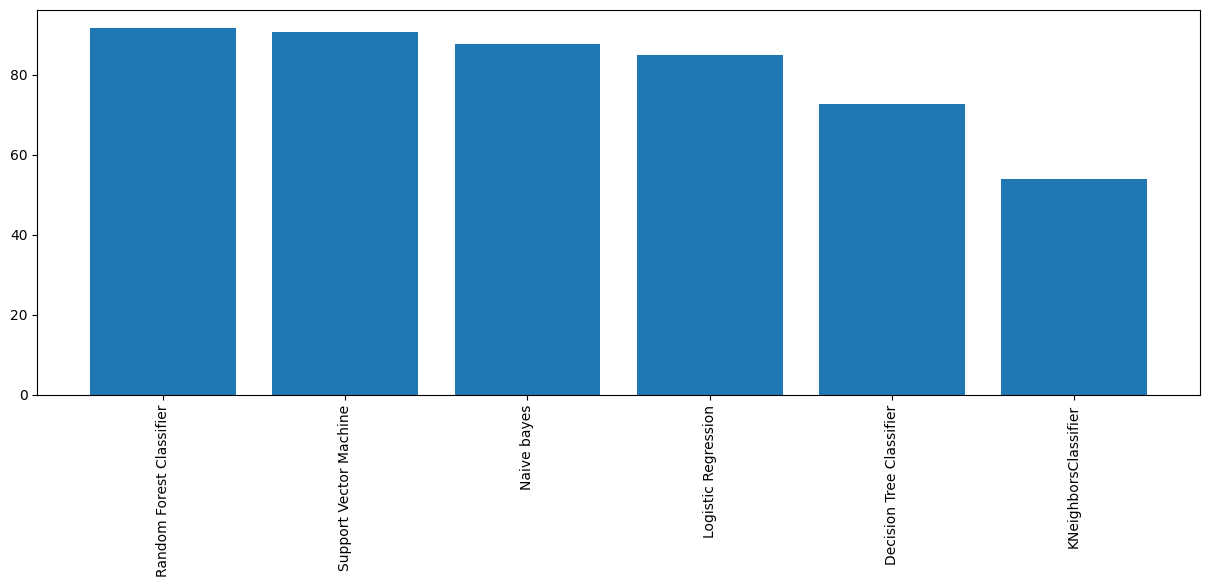

In [75]:
plt.figure(figsize = (15,5))
plt.bar(performance_df['Model'],performance_df['F1 Score']);
plt.xticks(rotation='vertical')
plt.show()


# Cheking alpha Naive Bayes Classifier

In [76]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.39%
Accuracy score for alpha=0.1 is: 97.78%
Accuracy score for alpha=0.2 is: 97.78%
Accuracy score for alpha=0.3 is: 97.78%
Accuracy score for alpha=0.4 is: 97.68%
Accuracy score for alpha=0.5 is: 97.68%
Accuracy score for alpha=0.6 is: 97.58%
Accuracy score for alpha=0.7 is: 97.29%
Accuracy score for alpha=0.8 is: 97.0%
Accuracy score for alpha=0.9 is: 97.0%
Accuracy score for alpha=1.0 is: 96.81%
--------------------------------------------
The best accuracy is 97.78% with alpha value as 0.1


# Fitting Naive Bayes to the Training set

In [77]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Predicting the Test set results

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy Score

In [80]:
acc_s = accuracy_score(y_test, y_pred)*100

In [81]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 97.78 %


In [82]:
import pickle

In [83]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))  #saves the TF-IDF vectorizer object to a binary file.
pickle.dump(mnb,open('model.pkl','wb'))        # saves the Multinomial Naive Bayes model object to a binary file.

# Loads a TF-IDF vectorizer and a machine learning model from pickle files.

In [84]:
tfidf = pickle.load(open("/content/vectorizer.pkl", 'rb'))
models = pickle.load(open("/content/model.pkl", 'rb'))

In [85]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"


In [86]:
# 1. Preprocess
transformed_sms = clean_message(sms)

# 2. Vectorize
vector_input = tfidf.transform([transformed_sms])

# 3. Predict
result = models.predict(vector_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Spam
